In [102]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from functools import reduce
from pandas.plotting import scatter_matrix, lag_plot, autocorrelation_plot

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [84]:
def get_data(token):
    if token == "FLOW":
        res = requests.get(f'https://api.cryptowat.ch/markets/kraken/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )       
    else:
        res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [18]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [19]:
df_base = pd.concat(get_data(token) for token in tokens)
df_baseVOLUME=df_base.groupby('token')['volumeUSD'].sum().to_frame()
df_baseVOLUME.sort_values('volumeUSD',ascending=False)

,volumeUSD
token,
ETH,2.484534e+10
SOL,8.141698e+09
AVAX,4.400095e+09
USDT,2.247220e+09
FLOW,9.661679e+07


In [20]:
df_base.set_index('ts',inplace=True)
df_base.loc[df_base['token'] == 'ETH', 'close']

ts
2021-11-22 00:00:00    4262.99
2021-11-22 01:00:00    4234.37
2021-11-22 02:00:00    4217.89
2021-11-22 03:00:00    4193.47
2021-11-22 04:00:00    4168.35
                        ...   
2021-12-19 04:00:00    3990.64
2021-12-19 05:00:00    4010.91
2021-12-19 06:00:00    3990.43
2021-12-19 07:00:00    3972.45
2021-12-19 08:00:00    3983.49
Name: close, Length: 657, dtype: float64

In [21]:
df_base.loc[df_base['token'] == 'SOL', 'close']

ts
2021-11-22 00:00:00    230.785
2021-11-22 01:00:00    226.000
2021-11-22 02:00:00    227.037
2021-11-22 03:00:00    223.117
2021-11-22 04:00:00    220.652
                        ...   
2021-12-19 04:00:00    184.630
2021-12-19 05:00:00    186.740
2021-12-19 06:00:00    185.800
2021-12-19 07:00:00    187.360
2021-12-19 08:00:00    188.690
Name: close, Length: 657, dtype: float64

In [27]:
Close_Ratio=pd.DataFrame(df_base.loc[df_base['token'] == 'ETH', 'close']/df_base.loc[df_base['token'] == 'SOL', 'close'])

In [30]:
Close_Ratio.rename(
    columns={
        'close':'ETH/SOL_Ratio'},
    inplace=True
)

Close_Ratio

,ETH/SOL_Ratio
ts,
2021-11-22 00:00:00,18.471694
2021-11-22 01:00:00,18.736150
2021-11-22 02:00:00,18.577985
2021-11-22 03:00:00,18.794937
2021-11-22 04:00:00,18.891059
...,...
2021-12-19 04:00:00,21.614256
2021-12-19 05:00:00,21.478580
2021-12-19 06:00:00,21.477018


In [35]:
df_base['ETH/SOL_Ratio']=Close_Ratio
df_base

,open,high,low,close,volume,volumeUSD,token,ETH/SOL_Ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-19 04:00:00,8.565,8.610,8.565,8.600,1797.236578,1.544555e+04,FLOW,21.614256
2021-12-19 05:00:00,8.609,8.630,8.609,8.628,2454.143371,2.116960e+04,FLOW,21.478580
2021-12-19 06:00:00,8.617,8.628,8.582,8.593,878.909600,7.555117e+03,FLOW,21.477018


In [43]:
df_base.rename(
    columns={
        'volume':'volumeBase',
    'volumeUSD':'volumeTerm'},
    inplace=True
)

df_base

,open,high,low,close,volumeBase,volumeTerm,token,ETH/SOL_Ratio
ts,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,18.891059
...,...,...,...,...,...,...,...,...
2021-12-19 04:00:00,8.565,8.610,8.565,8.600,1797.236578,1.544555e+04,FLOW,21.614256
2021-12-19 05:00:00,8.609,8.630,8.609,8.628,2454.143371,2.116960e+04,FLOW,21.478580
2021-12-19 06:00:00,8.617,8.628,8.582,8.593,878.909600,7.555117e+03,FLOW,21.477018


In [64]:
x=pd.merge(
    df_base.loc[df_base['token'] == 'ETH', 'close'],
    df_base.loc[df_base['token'] == 'SOL', 'close'],
    on='ts',
    how='inner'
)
x.rename(
    columns={
        'close_x':'close_ETH',
        'close_y':'close_SOL'
    },
    inplace=True
)
y=pd.merge(x,    
           df_base.loc[df_base['token'] == 'AVAX', 'close'],
           on='ts',
           how='inner'
)
z=pd.merge(y,
           df_base.loc[df_base['token'] == 'USDT', 'close'],
           on='ts',
           how='inner'          
)
fat_table=pd.merge(z,
               df_base.loc[df_base['token'] == 'FLOW', 'close'],
               on='ts',
               how='inner'
)
fat_table.rename(
    columns={
        'close_x':'close_AVAX',
        'close_y':'close_USDT',
        'close':'close_FLOW'
    },
    inplace=True
)
fat_table

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-19 04:00:00,3990.64,184.630,115.09,1.0004,8.600
2021-12-19 05:00:00,4010.91,186.740,114.73,1.0004,8.628
2021-12-19 06:00:00,3990.43,185.800,113.62,1.0004,8.593


In [107]:

new_fat_table=fat_table.reset_index()
for i in range(1,len(fat_table)):
    new_fat_table['close_ETH'][i]=np.log((fat_table['close_ETH'][i])/fat_table['close_ETH'][i-1])
    new_fat_table['close_SOL'][i]=np.log((fat_table['close_SOL'][i])/fat_table['close_SOL'][i-1])
    new_fat_table['close_AVAX'][i]=np.log((fat_table['close_AVAX'][i])/fat_table['close_AVAX'][i-1])
    new_fat_table['close_USDT'][i]=np.log((fat_table['close_USDT'][i])/fat_table['close_USDT'][i-1])
    new_fat_table['close_FLOW'][i]=np.log((fat_table['close_FLOW'][i])/fat_table['close_FLOW'][i-1])
new_fat_table.set_index('ts',inplace=True)
new_fat_table.drop(pd.to_datetime('2021-11-22 00:00:00'),inplace=True)

In [110]:
new_fat_table.rename(
    columns={
        'close_ETH':'returns_ETH',
        'close_SOL':'returns_SOL',
        'close_AVAX':'returns_AVAX',
        'close_USDT':'returns_USDT',
        'close_FLOW':'returns_FLOW',
    },
    inplace=True
)

In [131]:
new_fat_table.corr()

,returns_ETH,returns_SOL,returns_AVAX,returns_USDT,returns_FLOW
returns_ETH,1.000000,0.757219,0.654919,-0.090728,0.582950
returns_SOL,0.757219,1.000000,0.646298,0.106331,0.476310
returns_AVAX,0.654919,0.646298,1.000000,0.011298,0.404287
returns_USDT,-0.090728,0.106331,0.011298,1.000000,-0.176645
returns_FLOW,0.582950,0.476310,0.404287,-0.176645,1.000000


<AxesSubplot:xlabel='returns_ETH', ylabel='returns_FLOW'>

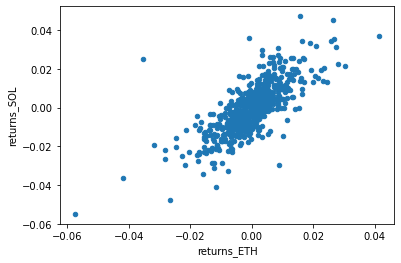

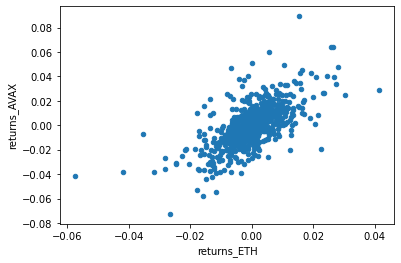

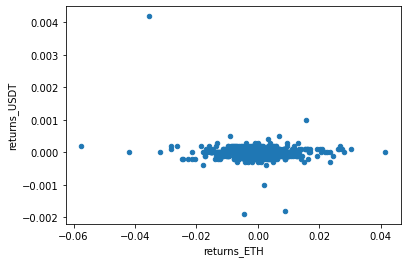

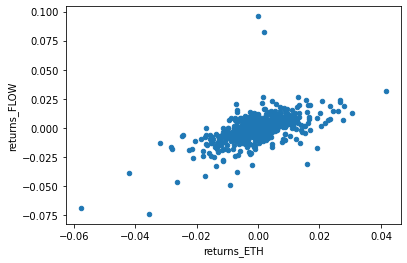

In [134]:
new_fat_table.plot(x='returns_ETH', y='returns_SOL', kind='scatter')
new_fat_table.plot(x='returns_ETH', y='returns_AVAX', kind='scatter')
new_fat_table.plot(x='returns_ETH', y='returns_USDT', kind='scatter')
new_fat_table.plot(x='returns_ETH', y='returns_FLOW', kind='scatter')
new_fat_table.plot(x='returns_SOL', y='returns_AVAX', kind='scatter')
new_fat_table.plot(x='returns_SOL', y='returns_USDT', kind='scatter')
new_fat_table.plot(x='returns_SOL', y='returns_FLOW', kind='scatter')
new_fat_table.plot(x='returns_AVAX', y='returns_USDT', kind='scatter')
new_fat_table.plot(x='returns_AVAX', y='returns_FLOW', kind='scatter')
new_fat_table.plot(x='returns_USDT', y='returns_FLOW', kind='scatter')